# SciKit Öğreniyorum

In [30]:
import pandas as pd
import random as ra
ra.seed(42)
x_1=ra.sample(range(1, 100), 10)
x_2=ra.sample(range(1, 100), 10)
a=pd.Series(x_1)
b=pd.Series(x_2)
c=pd.Series(['yes','no','yes','yes','yes','yes','yes','yes','no','no'])
#a function for our 'secret' model
y=2*a+3*b+5
# let's add change some values with None's to our data
y[3]=None
y[5]=None
#merging series as data frame
df=pd.DataFrame(data=dict(a=a, b=b,y=y,c=c), index=a.index)
df

a   b    c      y
0  64  51  yes  286.0
1   3   3   no   20.0
2  28  20  yes  121.0
3  23  65  yes    NaN
4  73  54  yes  313.0
5  67  22  yes    NaN
6  89  59  yes  360.0
7   9  81  yes  266.0
8  42   1   no   92.0
9  22  80   no  289.0

# Korelasyon Matrisi

In [31]:
#Let's look correlations
df.corr()

a         b         y
a  1.000000  0.026897  0.638869
b  0.026897  1.000000  0.864625
y  0.638869  0.864625  1.000000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001EE2C0F0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000021C84E48>]], dtype=object)

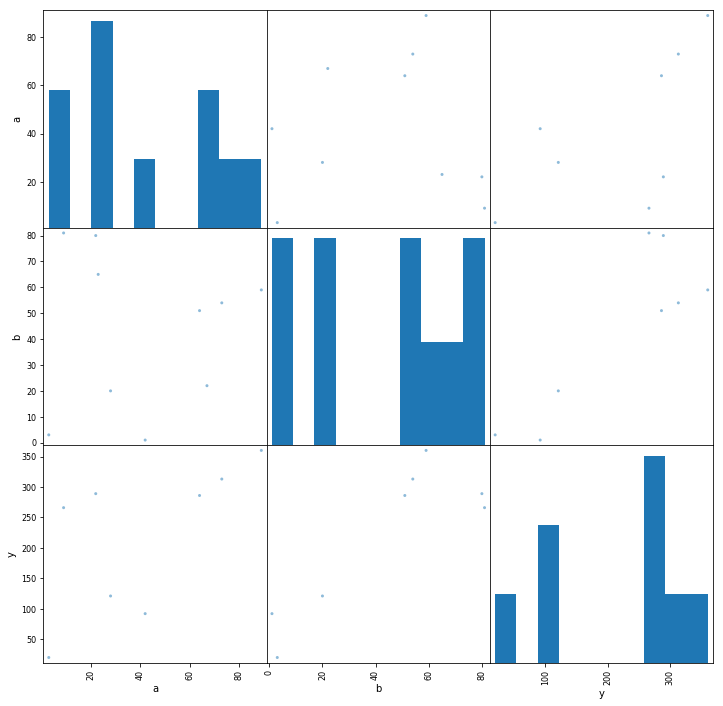

In [25]:
#from pandas.plotting import scatter_matrix
import pandas.plotting
attr=["a","b","y"]
%matplotlib inline
scatter_matrix(df[attr],figsize=(12,12))
#Let's assume we do not know the our y model and find it with regression via sci kit

In [32]:
df

a   b    c      y
0  64  51  yes  286.0
1   3   3   no   20.0
2  28  20  yes  121.0
3  23  65  yes    NaN
4  73  54  yes  313.0
5  67  22  yes    NaN
6  89  59  yes  360.0
7   9  81  yes  266.0
8  42   1   no   92.0
9  22  80   no  289.0

#  Boş değerleri doldurma
c kolonundaki boş değerler yerine medyan değerleri koymak istiyoruz.

In [48]:
#kategorik değerlerin medyanı alınamaycağına göre onları şimdilik sileriz
df_sayisal=df.drop('c',axis=1)
df_sayisal

a   b      y
0  64  51  286.0
1   3   3   20.0
2  28  20  121.0
3  23  65    NaN
4  73  54  313.0
5  67  22    NaN
6  89  59  360.0
7   9  81  266.0
8  42   1   92.0
9  22  80  289.0

In [58]:
from sklearn.preprocessing import Imputer
imp=Imputer(strategy='mean')
imp.fit(df_sayisal)
df_sayisal
X=imp.transform(df_sayisal)
X

array([[  64.   ,   51.   ,  286.   ],
       [   3.   ,    3.   ,   20.   ],
       [  28.   ,   20.   ,  121.   ],
       [  23.   ,   65.   ,  218.375],
       [  73.   ,   54.   ,  313.   ],
       [  67.   ,   22.   ,  218.375],
       [  89.   ,   59.   ,  360.   ],
       [   9.   ,   81.   ,  266.   ],
       [  42.   ,    1.   ,   92.   ],
       [  22.   ,   80.   ,  289.   ]])

In [61]:
#Değerler array'a dönüşür onu df'a geri çeviriyoruz
df_donusmus=pd.DataFrame(X)
df_donusmus
#Boş değerler yerine ortalamaları eklemiş olduk

0     1        2
0  64.0  51.0  286.000
1   3.0   3.0   20.000
2  28.0  20.0  121.000
3  23.0  65.0  218.375
4  73.0  54.0  313.000
5  67.0  22.0  218.375
6  89.0  59.0  360.000
7   9.0  81.0  266.000
8  42.0   1.0   92.000
9  22.0  80.0  289.000

# Kategorik değerleri sayısallaştırma

In [64]:

#kategorik değerimiz c idi
df['c']

0    yes
1     no
2    yes
3    yes
4    yes
5    yes
6    yes
7    yes
8     no
9     no
Name: c, dtype: object

In [66]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
c_kodlanmis=enc.fit_transform(df['c'])
c_kodlanmis

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 0], dtype=int64)

In [69]:
#Eşleşmelere bakalı
enc.classes_

array(['no', 'yes'], dtype=object)

# OneHot Kodlama

In [73]:
from sklearn.preprocessing import OneHotEncoder
enco=OneHotEncoder()
c_oh_kodlanmis=enco.fit_transform(c_kodlanmis.reshape(-1,1))
c_oh_kodlanmis
#çevir arraya
c_oh_kodlanmis.toarray()

array([[ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.]])

Algoritmalarda kategorik değerlere sayısal değer verince bu kez algoritmalar birbiri ile dışsal olan kategorileri skalar olarak algılar. Örneğin 0: hayır 1: evet 2:kesinlikle gibi değerler arasında kesikli değer yoktur bunlar ayrı değerledir diyelim. Bu durumda cevap kategorisine 0 1 2 emek yerine hayir_mi: 0,1 evet_mi: 0,1 şeklinde gitme mantığına OneHot encoding denilir. Scikit yukarıdaki şekilde olduğu gibi bir çevrim yapma gücüne sahiptir. 

Yukarıdaki kademeli işlemler yerine **LabelBinarizer** adlı kütüphane yardımı ile tek seferde dönüşüm mümkündür.

In [76]:
from sklearn.preprocessing import LabelBinarizer
labin=LabelBinarizer()
c_labin=labin.fit_transform(c)
c_labin

array([[1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0]])

Başka örnek

In [77]:
d1=['cay','kahve','sut','cay','kahve','kahve']
d1_labin=labin.fit_transform(d1)
d1_labin

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0]])

Görüldüğü üzere 1. kolon aslında çay mı, 2. kolon kahve mi 3. kolon süt mü demek. ilk kolonda 2 yerdeki 1 tam oraların çay olduğunu gösteriyor.

# Dönüşüm Pipeline'ları

In [82]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline=Pipeline([
    ('imputer',Imputer(strategy="mean")),
    ('std_scaler',StandardScaler())
])

In [86]:
#df_sayisal üzerinde işlem yapacağız
df_sayisal

a   b      y
0  64  51  286.0
1   3   3   20.0
2  28  20  121.0
3  23  65    NaN
4  73  54  313.0
5  67  22    NaN
6  89  59  360.0
7   9  81  266.0
8  42   1   92.0
9  22  80  289.0

In [85]:

#şimdi df_sayisal'a toplu işlem yapıyoruz
df_sayisal_komple=num_pipeline.fit_transform(df_sayisal)
#dönüşmüş hali
df_sayisal_komple

array([[ 0.7854138 ,  0.26051816,  0.65793199],
       [-1.39232447, -1.42932939, -1.93001493],
       [-0.49980878, -0.83084171, -0.94737343],
       [-0.67831192,  0.75339037,  0.        ],
       [ 1.10671945,  0.36613364,  0.92061834],
       [ 0.89251568, -0.7604314 ,  0.        ],
       [ 1.67792949,  0.54215942,  1.37788715],
       [-1.1781207 ,  1.31667288,  0.46334952],
       [ 0.        , -1.4997397 , -1.22951801],
       [-0.71401255,  1.28146773,  0.68711937]])

Bir pipeline'de kategorik değerler için oluşturalım.

In [87]:
df

a   b    c      y
0  64  51  yes  286.0
1   3   3   no   20.0
2  28  20  yes  121.0
3  23  65  yes    NaN
4  73  54  yes  313.0
5  67  22  yes    NaN
6  89  59  yes  360.0
7   9  81  yes  266.0
8  42   1   no   92.0
9  22  80   no  289.0